In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_ferro.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_ferro.pkl")

In [4]:
betas = res_ex["betas"]

In [6]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.032 std_fe: 3.16E-02 M: 0.007 S: 0.683 E: -0.199: 0.0254, B1 = -0.003
fe: -3.671 std_fe: 6.71E-02 M: 0.007 S: 0.650 E: -0.422: 0.0336, B1 = -0.004
fe: -2.636 std_fe: 1.07E-01 M: 0.005 S: 0.572 E: -0.729: 0.0266, B1 = 0.021
fe: -2.236 std_fe: 8.92E-02 M: 0.005 S: 0.327 E: -1.418: 0.035, B1 = -0.0142
fe: -2.122 std_fe: 3.51E-02 M: 0.009 S: 0.149 E: -1.825: 0.0189, B1 = 0.0125
fe: -2.083 std_fe: 1.67E-02 M: 0.003 S: 0.086 E: -1.940: 0.00625, B1 = 0.009
fe: -2.066 std_fe: 1.02E-02 M: 0.001 S: 0.063 E: -1.976: 0.0329, B1 = 0.0084
fe: -2.056 std_fe: 4.91E-03 M: 0.006 S: 0.053 E: -1.989: 0.0212, B1 = -0.0022
fe: -2.049 std_fe: 2.65E-03 M: 0.020 S: 0.047 E: -1.996: 0.00788, B1 = 0.0043
fe: -2.044 std_fe: 9.53E-04 M: 0.004 S: 0.045 E: -1.998 0.028, B1 = 0.0010003
fe: -2.039 std_fe: 2.98E-03 M: 0.004 S: 0.044 E: -2.000 0.026, B1 = -0.000445
fe: -2.036 std_fe: 1.84E-03 M: 0.005 S: 0.044 E: -1.9990.024, B1 = 0.001001
fe: -2.033 std_fe: 3.10E-03 M: 0.021 S: 0.044 E: -1.9990.062, B1 = 0.00302

In [7]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.032 std_fe: 2.18E-02 M: 0.005 S: 0.682 E: -0.208: 0.0306, B1 = 0.129
fe: -3.676 std_fe: 3.61E-02 M: 0.006 S: 0.644 E: -0.455: 0.0294, B1 = 0.399
fe: -2.659 std_fe: 4.18E-02 M: 0.009 S: 0.549 E: -0.830: 0.0151, B1 = 0.960
fe: -2.271 std_fe: 3.24E-02 M: 0.015 S: 0.354 E: -1.387: 0.0171, B1 = 1.954
fe: -2.137 std_fe: 1.52E-02 M: 0.009 S: 0.185 E: -1.766: 0.0435, B1 = 3.205
fe: -2.089 std_fe: 6.66E-03 M: 0.002 S: 0.108 E: -1.909: 0.00687, B1 = 4.321
fe: -2.068 std_fe: 1.81E-03 M: 0.012 S: 0.072 E: -1.965: 0.0188, B1 = 5.293
fe: -2.056 std_fe: 8.90E-04 M: 0.005 S: 0.057 E: -1.985: 0.0153, B1 = 6.211
fe: -2.049 std_fe: 2.34E-04 M: 0.009 S: 0.050 E: -1.994: 0.00275, B1 = 7.091
fe: -2.044 std_fe: 1.56E-03 M: 0.000 S: 0.047 E: -1.9960.014, B1 = 7.31598
fe: -2.040 std_fe: 1.21E-03 M: 0.007 S: 0.045 E: -1.9990.014, B1 = 7.723716
fe: -2.036 std_fe: 3.10E-03 M: 0.019 S: 0.045 E: -1.9980.008, B1 = 7.87467
fe: -2.033 std_fe: 3.99E-03 M: 0.008 S: 0.045 E: -1.999.004, B1 = 7.91067
fe: -2.031 std

In [8]:
res_ex["fe"]

array([-7.03286778, -3.67858449, -2.66365069, -2.27517078, -2.13817089,
       -2.08922218, -2.06794335, -2.05641979, -2.04901373, -2.04367009,
       -2.03952387, -2.03615881, -2.03334806, -2.03095391, -2.02888525,
       -2.02707779, -2.02548408, -2.02406792, -2.02280103, -2.02166091])

In [9]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False,
                           stats=20000,
                           x_hat_clip = False, 
                           i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.033 std_fe: 1.81E-05 M: 0.006 S: 0.682 E: -0.210: 0.0211, B1 = 0.004
fe: -3.678 std_fe: 4.12E-05 M: 0.006 S: 0.645 E: -0.455: 0.0129, B1 = 0.008
fe: -2.664 std_fe: 7.38E-05 M: 0.007 S: 0.548 E: -0.839: 0.0196, B1 = -0.024
fe: -2.279 std_fe: 3.11E-04 M: 0.010 S: 0.364 E: -1.368: 0.015, B1 = -0.0058
fe: -2.132 std_fe: 2.97E-04 M: 0.005 S: 0.168 E: -1.797: 0.0616, B1 = -0.006
fe: -2.095 std_fe: 1.37E-03 M: 0.099 S: 0.124 E: -1.888: 0.0474, B1 = -0.003
fe: -2.067 std_fe: 1.80E-05 M: 0.002 S: 0.067 E: -1.971: 0.0155, B1 = -0.005
fe: -2.056 std_fe: 3.97E-05 M: 0.010 S: 0.054 E: -1.988: 0.00587, B1 = -0.000
fe: -2.049 std_fe: 2.31E-06 M: 0.005 S: 0.047 E: -1.996: 0.0341, B1 = 0.00311
fe: -2.044 std_fe: 1.04E-06 M: 0.023 S: 0.046 E: -1.998 0.024, B1 = -0.000002
fe: -2.039 std_fe: 2.06E-06 M: 0.009 S: 0.045 E: -1.9990.086, B1 = -0.00182
fe: -2.036 std_fe: 3.04E-06 M: 0.005 S: 0.044 E: -2.0000.004, B1 = -0.0023
fe: -2.033 std_fe: 2.87E-06 M: 0.009 S: 0.044 E: -2.0000.03, B1 = -0.002001
fe

In [10]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.031, ener: -0.199, M: 0.000, iter 9
fe: -3.664, ener: -0.395, M: 0.000, iter 15
fe: -2.606, ener: -0.583, M: 0.000, iter 43
fe: -2.165, ener: -1.315, M: 0.736, iter 40
fe: -2.050, ener: -1.768, M: 0.929, iter 14
fe: -2.017, ener: -1.912, M: 0.975, iter 9
fe: -2.006, ener: -1.964, M: 0.990, iter 8
fe: -2.002, ener: -1.985, M: 0.996, iter 7
fe: -2.001, ener: -1.994, M: 0.998, iter 6
fe: -2.000, ener: -1.997, M: 0.999, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 3
fe: -2.000, ener: -2.000, M: 1.000, iter 3
fe: -2.000, ener: -2.000, M: 1.000, iter 3


In [5]:
from save_data import save_pickle_zip
all_res = {
    "nn":res_nn,
    "nn_is": res_nn_is,
    "nn_z2":res_nn_z2,
    "bp":res_bp
}
save_pickle_zip("./results/ferro_2d.pkl", all_res)

NameError: name 'res_nn' is not defined

# results

In [6]:
from save_data import load_pickle_zip
all_res = load_pickle_zip("./results/ferro_2d.pkl")
res_nn = all_res["nn"]
res_nn_z2 = all_res["nn_z2"]
res_nn_is = all_res["nn_is"]
res_bp = all_res["bp"]

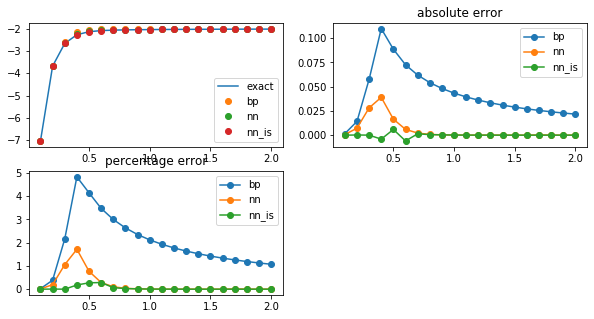

In [7]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

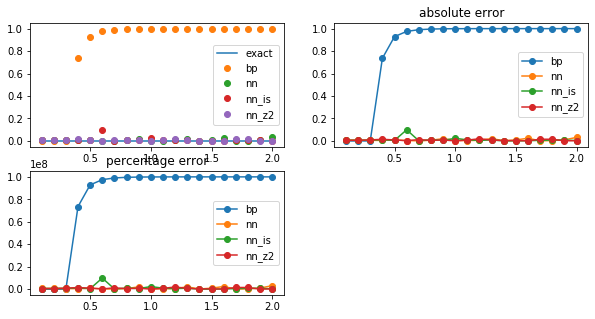

In [8]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is, res_nn_z2])
plt.show()

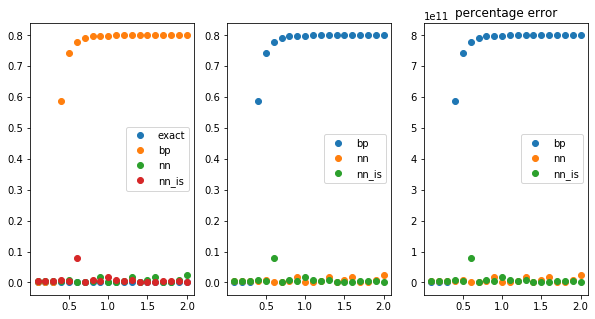

In [9]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

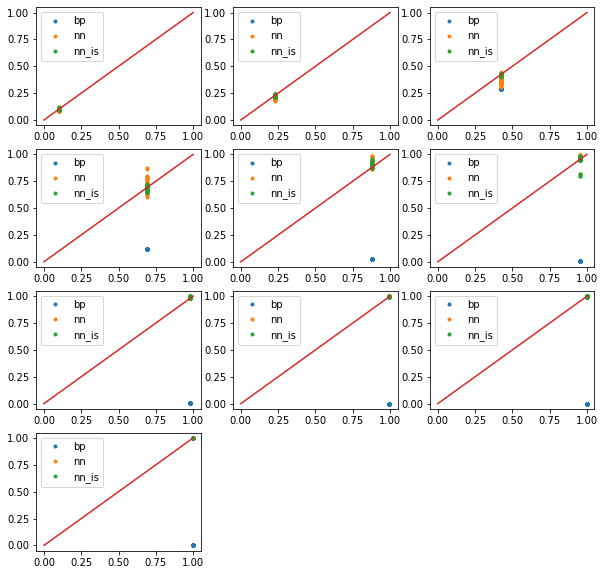

In [10]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:10], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

# Plots

<function matplotlib.pyplot.show(*args, **kw)>

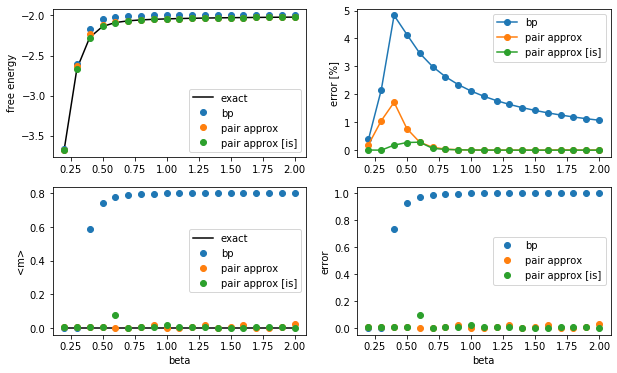

In [15]:
import matplotlib.pyplot as plt
init_ =1
name_file = "ferro_2d.pdf"
label="fe"

others = [res_bp, res_nn, res_nn_is]
res_nn["name"] = "pair approx"
res_nn_is["name"] = "pair approx [is]"

plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/len(res_ex[label]),
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/len(other[label]), "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show